## PRODUCCIÓN DE AZUCAR EN COLOMBIA EN 1995-2016
##### Oscar Julian Layton


La información relativa a la producción de algunos bienes del sector industrial en Colombia desde el año 1995 hasta la fecha, los datos son proporcionados por el banco de la república en mediciones mensuales a través de la variable de producción real a nivel nacional, incluyendo algunos bienes como Azucar, cemento gris, Lingotes de acero y producción de carbón. Para hacer un análisis de serie de tiempo, se usa la serie perteneciente a la **producción de azucar en Colombia** el cual es medido en toneladas por mes.

Con el objetivo de destablecer una secuencia de pasos para el analisis de la serie de tiempo, Se hace necesario el uso de **R** como herramienta computacional.

In [1]:
library(readr)
library(readxl)
industriacol <- read_excel("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\series de tiempo\\codigos\\industriadsd1995.xls")


Teniendo en cuenta que la información de la producción azucarera se identifica que hace parte de mediciones mensuales desde febrero de 1995 hasta el 16 de marzo de 2016, de esta forma se procede a conviertir la informacion en un objeto de series de tiempo con la por medio de la funcion ts de R, indicando el periodo de inicio y la frecuencia de las mediciones los cuales son (1995,2) febrero de 1995 con una frecuencia de 12. A continuación se presentan los primeros 24 observaciones.

In [2]:
azucar=ts(industriacol['Azucar'],start=c(1995,2),frequency=12) #frec:periodicidad, comienza en 1949
head(azucar,24)

[1] 186151 188408 123473 170266 168927 182420 199119 189389 163727 158211
[11] 147899 166172 168295 174564 112499 172187 165433 199514 227164 216748
[21] 204366 190076 152205 130083

No obstante, se procede a realizar las serie de tiempo, según las especificaiones anteriores:

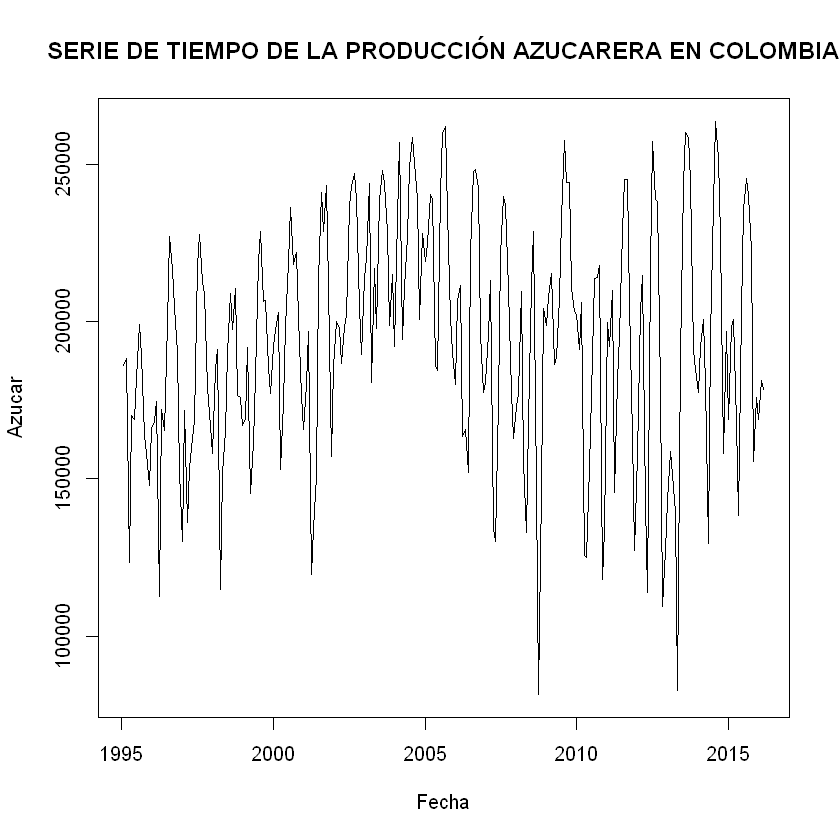

In [3]:
plot(azucar, main="SERIE DE TIEMPO DE LA PRODUCCIÓN AZUCARERA EN COLOMBIA", xlab="Fecha")

El primer análisis que puede desarrollarse en la serie es netamente descriptivo, en este orden de ideas se puede obsrvar que la serie no tiene ningún patrón, la serie no tiene una media constante al transcurrir los años "la media no es la misma a lo largo del tiempo", asi  mismo se logra observar una tendencia en los primeros años la cual decrece aproximadamente en los últimos años.

## Descomposición basada promedios moviles

Para el proceso estocástico $\{  X_t \}$ no estacionario, existen diversas estrategias para convertirlo en un proceso $\{  Y_t \}$ estacionario, se propone desarrollar el metodo de descomposicion basado en filtros el cual consiste en estimar los componentes de $\{  X_t \}$ de la siguiente forma:

$$X_t = M_t + S _t + Y_t$$


Donde llamaremos a $M_t$ el componente de tendencia, a $S_t$ la componente estacional, la filosofia consiste en estimar estas componentes y luego restarlas al proceso no estacionario para convertirlo en $Y_t$ el cual es estacionario.

## Desarrollo

En referencia a la serie de tiempo, a primera vista se logra observar que a traves del tiempo la varianza alcanza a aumentar un poco, dado lo anterior se ve la necesidad de buscar metodologias para identificar si existe la no estabilidad en la varianza, en este orden de ideas si fuese necesario se usara la transformacion **Box-Cox** el cual transforma los datos de la serie segun un lambda especifico el cual logre homogeneizar la varianza, dicha transformacion tiene la forma:

$$
f_x(U_t)=\left\{\begin{matrix}
 \lambda^-1 (U^{\lambda}_t - 1) & U_t\geq 0 & \lambda>0\\ 
Ln (U_t) & U_t >0 & \lambda=0
\end{matrix}\right.
$$

Este procedimiento puede ser usaro rapidamente en R por medio del siguiente codigo:


In [5]:
library(forecast)
forecast::BoxCox.lambda(azucar, method = "guerrero", lower = 0, upper = 2)  

[1] 1.999959

Por consiguiente el valor de lambda es cercano a 1,  en este orden de ideas lo mas aconsejable es no realizar una transformacion a los datos, en otras palabras no es necesario estabilizar la varianza:

Como segundo paso, se realiza propiamente el proceso basado en promedios moviles 

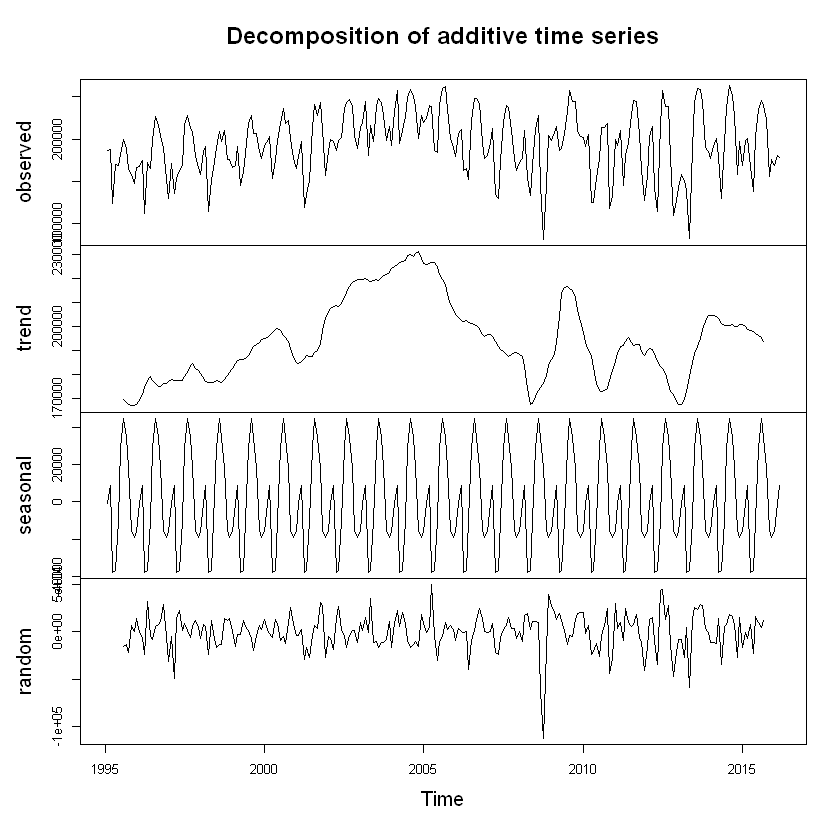

In [6]:
deslAirPass=decompose(azucar)
plot(deslAirPass)


En la grafica anterior puede observarse el resumen del proceso de descomposicion realizado, mostrandose en la primera grafica la serie original sin transformación BoxCox, en la segunda grafica puede observar la componente de tendencia de la serie, en la tercera serie se identifica la componente estacional y en la última serie se puede observar la serie resultante  $Y_t$  obtenida despues de quitar la componente de tendencia y de estacionariedad, dicha serie resultante $Y_t$ es estacional vease la siguiente serie de tiempo:

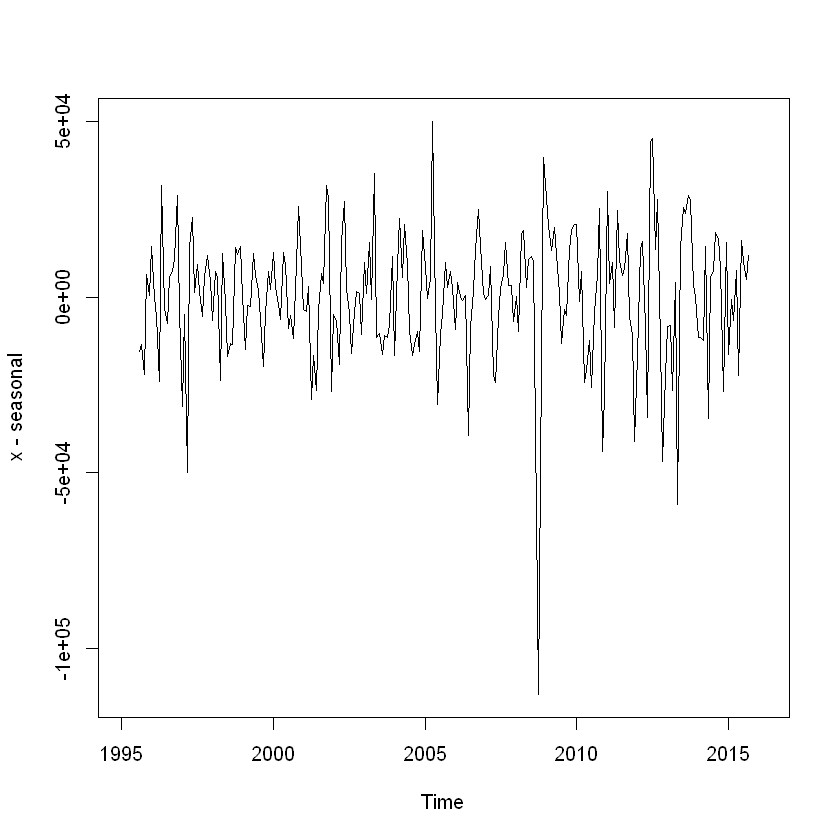

In [7]:
plot(deslAirPass$random)

Finalmente el proceso realizado para volver una serie de tiempo estacionaria basado en promedios moviles es estimar y quitar las componentes anteriormente descritas quedando $X_t - M_t - S _t = Y_t$, el modelo para la serie estaría determinado por un modelo estacional ARMA(p,q).

## Análisis de la serie resultante estacionaria

Para observar si la serie $Y_t$ obtenida mediante el proceso de promedios móviles tiene alguna estructura de correlación, ha de observarse su función de autocorrelación simple. Hay que tener en cuenta que mediante el proceso de promedios moviles se generan observaciones faltantes, (datos faltantes) lo cual podra observarse y solucionarse mediante:

In [10]:
deslAirPass$random
length(deslAirPass$random)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : el argumento formal "cols" concuerda con múltiples argumentos especificados

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,,NA,NA,NA,NA,NA,NA,-15556.2617,-13429.6963,-22108.8540,6511.7564,464.5981
1996,14490.0564,-134.2207,-5612.5061,-24002.2852,31905.3335,-3317.5727,-7526.0144,5849.1966,7417.1371,10861.5627,29005.1314,-4403.7352
1997,-31103.1102,-4993.3457,-49870.4227,14098.7564,22637.0835,1310.8439,9286.8606,1613.4466,-5517.9879,5868.0210,11817.4231,4425.2648
1998,-6558.1102,7407.9877,5521.9106,-23790.4936,12556.9168,-1641.9894,-16851.8894,-13331.7617,-13469.4463,14049.1460,12043.5064,14532.6398
1999,219.2231,-14994.9707,-2504.2977,-2686.9936,12400.6668,6125.9689,1847.1106,-6506.1367,-19874.3629,-4267.6457,7317.6731,2113.6398
2000,12842.2231,2592.1127,-2011.7144,-6305.9936,12798.6668,9367.4273,-8846.3894,-5196.2201,-11823.6546,9617.4377,25851.2564,9077.8898
2001,-3465.3602,-4000.8040,2963.1189,-29241.6602,-16765.6665,-26673.3644,-3752.9311,6657.6133,3851.1787,31685.9377,28006.5064,-26909.9852
2002,-5014.7769,-6753.1790,-19114.2144,15772.3398,27247.8752,2527.8023,-4794.5977,-16068.0534,-4293.8629,1723.2710,1069.0481,-10728.0269
2003,9955.4314,1142.6960,15537.1189,-805.3269,35234.3752,-11495.9894,-10295.2227,-16273.3451,-10988.9046,-11480.3123,-7763.9519,11579.5564
2004,-16661.8602,8597.4043,22450.2856,5669.7564,20757.8335,9285.5106,-9544.8061,-16697.3034,-13581.9046,-9912.2290,-15421.4936,18986.3481


[1] 254

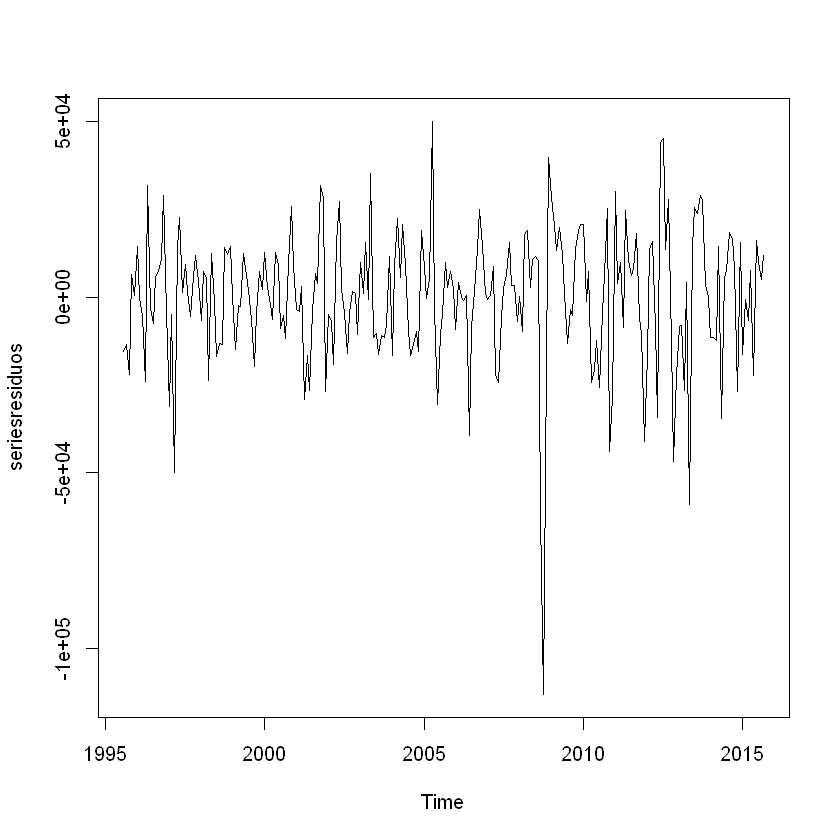

In [11]:
residuos<-deslAirPass$random[7:(254-6)]
seriesresiduos=ts(residuos,start=c(1995,8),frequency=12)
plot(seriesresiduos)

La anterior gráfica muestra la serie estacionaria $y_t$ la cual mediante el proceso de promedios móviles son los residuos además de quitarsele los datos faltantes. Por consiguiente se presenta la funcion de autocorrelacion simple para el proceso resultante:

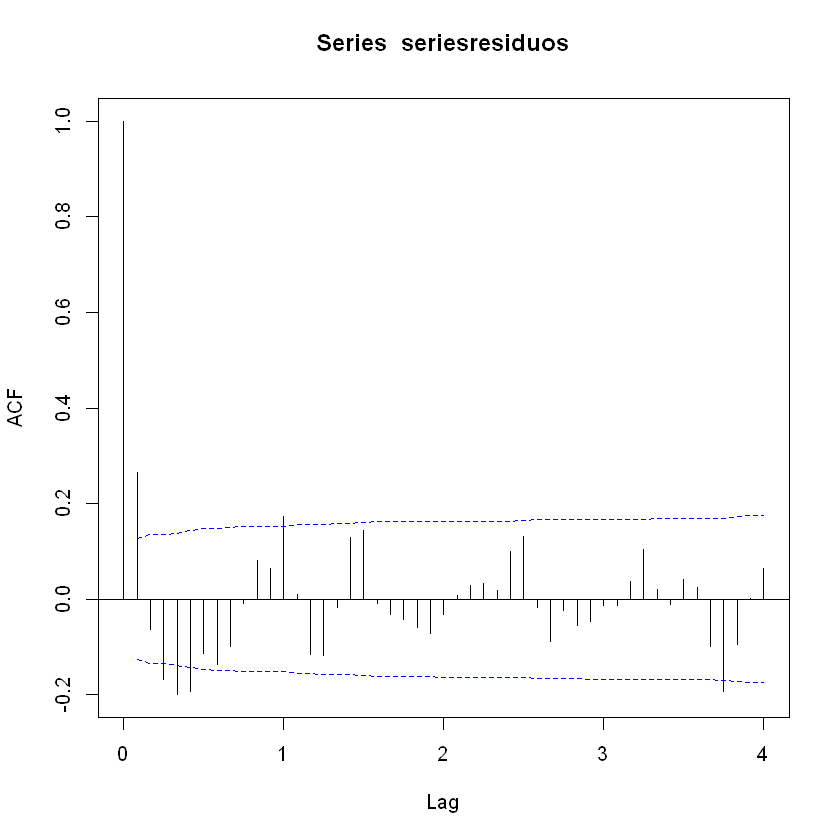

In [12]:
acf(seriesresiduos,ci.type="ma",lag.max=48)


En la grafica de la función de autocorrelación simple puede observarse que para los rezagos 1,3,4,5 y 12 la correlacion se sale de las bandas de confianza lo que indicaria que son significativos para el proceso, es decir son diferentes de cero. Finalmente el proceso realizado para volver una serie de tiempo a una estacionaria es buena, el modelo para la serie estaría determinado por un componente de promedios móviles MA(12), para determinar si existe algun componente autorregresivo se observará la siguiente función de autocorrelación parcial

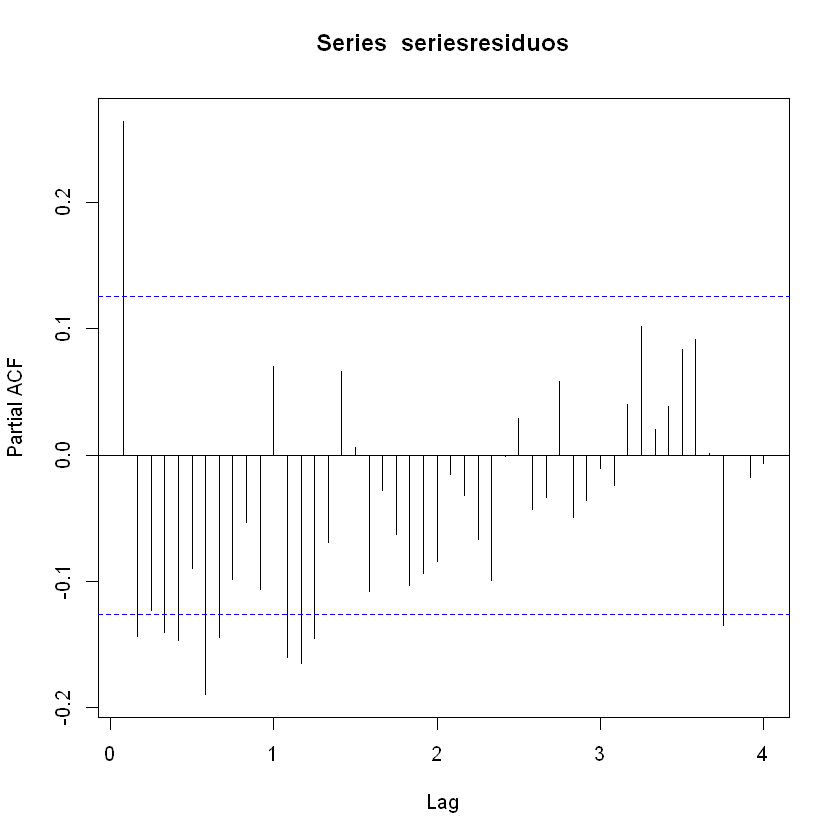

In [13]:
pacf(seriesresiduos,lag.max=48)

Al observar pacf se observa que los datos tienen componente autorregresiva puesto que la funcion de autocorrelacion parcial no se va rápidamente para cero (rezagos altos de ellas son significativos). En este orden de ideas el modelo estaría determinado también por un componente autorregresivo AR(15)

## Análisis del modelo segúin criterios de información

Considerando que los ordenes máximos para los compnentes autorregresivos y promedios móviles son $p=15$ y $q=12$ respectivamente, se procede a ajustar un modelo para cada componente:

In [14]:
salidaAR15=arima(seriesresiduos,order=c(15,0,0))
salidaMA12=arima(seriesresiduos,order=c(0,0,12))
salidaAR15
salidaMA12


Call:
arima(x = seriesresiduos, order = c(15, 0, 0))

Coefficients:
         ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      0.1242  -0.2369  -0.1995  -0.2461  -0.2624  -0.1939  -0.2858  -0.2317
s.e.  0.0635   0.0633   0.0641   0.0655   0.0656   0.0673   0.0673   0.0679
          ar9     ar10     ar11    ar12     ar13     ar14     ar15  intercept
      -0.2072  -0.1147  -0.2374  0.0418  -0.1806  -0.1342  -0.1588    24.1022
s.e.   0.0678   0.0685   0.0674  0.0671   0.0660   0.0648   0.0644   299.6027

sigma^2 estimated as 256884991:  log likelihood = -2687.63,  aic = 5409.27


Call:
arima(x = seriesresiduos, order = c(0, 0, 12))

Coefficients:
         ma1      ma2      ma3      ma4      ma5      ma6      ma7      ma8
      0.0206  -0.3336  -0.3526  -0.2776  -0.2412  -0.1144  -0.0865  -0.0634
s.e.  0.0651   0.0679   0.0729   0.0742   0.0750   0.0807   0.0988   0.0896
         ma9    ma10    ma11    ma12  intercept
      0.0529  0.1669  0.0221  0.2068    17.2994
s.e.  0.0635  0.0849  0.0727  0.0810    16.2290

sigma^2 estimated as 236671905:  log likelihood = -2680.43,  aic = 5388.87

Se puede observar que la varianza del MA(12) es más pequeño que el AR(15), asi como el AIC lo cual sugiere irnos por el MA(12), en este orden de ideaS, se procede a ver la significancia del modelo con el fin de ir ajustando un modelo donde se involucren cada vez menos parametros a estimar, el procedimiento inicia con observar cuales parámetros son significativos:

In [16]:
library(lmtest)
library(forecast)

In [17]:
coeftest(salidaMA12)


z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ma1        0.020649   0.065101  0.3172  0.751107    
ma2       -0.333641   0.067850 -4.9173 8.774e-07 ***
ma3       -0.352631   0.072882 -4.8384 1.309e-06 ***
ma4       -0.277649   0.074155 -3.7441  0.000181 ***
ma5       -0.241167   0.075035 -3.2141  0.001309 ** 
ma6       -0.114417   0.080715 -1.4176  0.156321    
ma7       -0.086523   0.098835 -0.8754  0.381337    
ma8       -0.063413   0.089637 -0.7074  0.479288    
ma9        0.052905   0.063524  0.8328  0.404939    
ma10       0.166909   0.084895  1.9661  0.049292 *  
ma11       0.022150   0.072729  0.3045  0.760711    
ma12       0.206847   0.080979  2.5543  0.010639 *  
intercept 17.299383  16.228978  1.0660  0.286443    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Se puede observar que el intercepto no es significativo, los que son altamente significativos son $\theta_2, \theta_3,\theta_4,\theta_5$ hay que ajustar de nuevo el modelo para afirmar que de hecho los demás parámetros no son significativos. Es decir ajustar nuevos modelos donde se involucren cada vez menos parametros.

Primero el intercepto no fue significativo, luego se ajusta el modelo sin el intercepto como se muestra en la siguiente salida, la cual especifica los mísmos parámetros significativos:

In [18]:
salidaMA12fixed=Arima(seriesresiduos,order=c(0,0,12),include.mean = TRUE, fixed=c(NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0),method = c("CSS-ML"))  
coeftest(salidaMA12fixed)


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ma1   0.031805   0.065131  0.4883 0.6253192    
ma2  -0.322628   0.068440 -4.7140 2.429e-06 ***
ma3  -0.345174   0.073210 -4.7148 2.419e-06 ***
ma4  -0.274042   0.074288 -3.6889 0.0002252 ***
ma5  -0.239078   0.074494 -3.2094 0.0013302 ** 
ma6  -0.114050   0.080000 -1.4256 0.1539783    
ma7  -0.087192   0.098787 -0.8826 0.3774411    
ma8  -0.066901   0.089998 -0.7434 0.4572628    
ma9   0.048046   0.063040  0.7622 0.4459643    
ma10  0.159880   0.083715  1.9098 0.0561573 .  
ma11  0.015841   0.071512  0.2215 0.8246864    
ma12  0.201061   0.079439  2.5310 0.0113730 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Luego quitando los parámetros 11 y 12, se obtiene:

In [19]:
salidaMA12fixed=Arima(seriesresiduos,order=c(0,0,12),include.mean = TRUE, fixed=c(NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0),method = c("CSS-ML"))
coeftest(salidaMA12fixed)


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ma1   0.024707   0.071877  0.3437 0.7310361    
ma2  -0.401043   0.070891 -5.6571 1.539e-08 ***
ma3  -0.407743   0.071541 -5.6995 1.202e-08 ***
ma4  -0.270699   0.089790 -3.0148 0.0025715 ** 
ma5  -0.183949   0.080886 -2.2742 0.0229547 *  
ma6  -0.039359   0.063685 -0.6180 0.5365618    
ma7  -0.060359   0.092385 -0.6533 0.5135372    
ma8  -0.043242   0.088686 -0.4876 0.6258428    
ma9   0.116339   0.058423  1.9913 0.0464446 *  
ma10  0.265301   0.079453  3.3391 0.0008406 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



En consecuencia realizando el procedimiento repetidas veces, se obtiene que al quitar parámetros, los $\theta_2, \theta_3,\theta_4,\theta_5$ siempre son significativos, ver la siguiente entrada:

In [20]:
salidaMA12fixed=Arima(seriesresiduos,order=c(0,0,12),include.mean = TRUE, fixed=c(0,NA,NA,NA,NA,0,0,0,0,0,0,0,0),method = c("CSS-ML"))
coeftest(salidaMA12fixed)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ma2 -0.281732   0.062301 -4.5221 6.124e-06 ***
ma3 -0.309285   0.060417 -5.1192 3.068e-07 ***
ma4 -0.252743   0.057721 -4.3787 1.194e-05 ***
ma5 -0.163752   0.059838 -2.7366  0.006208 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Por lo tanto el modelo que mejor se ajusta  a los datos es un **MA(5)**, ya obtenido el modelo que se ajusta a las observaciones, por lo tanto el modelo está dado por:

$$ X_t= -0.281Z_{t-2}-0.309Z_{t-3}-0.252Z_{t-4}-0.163Z_{t-5} $$

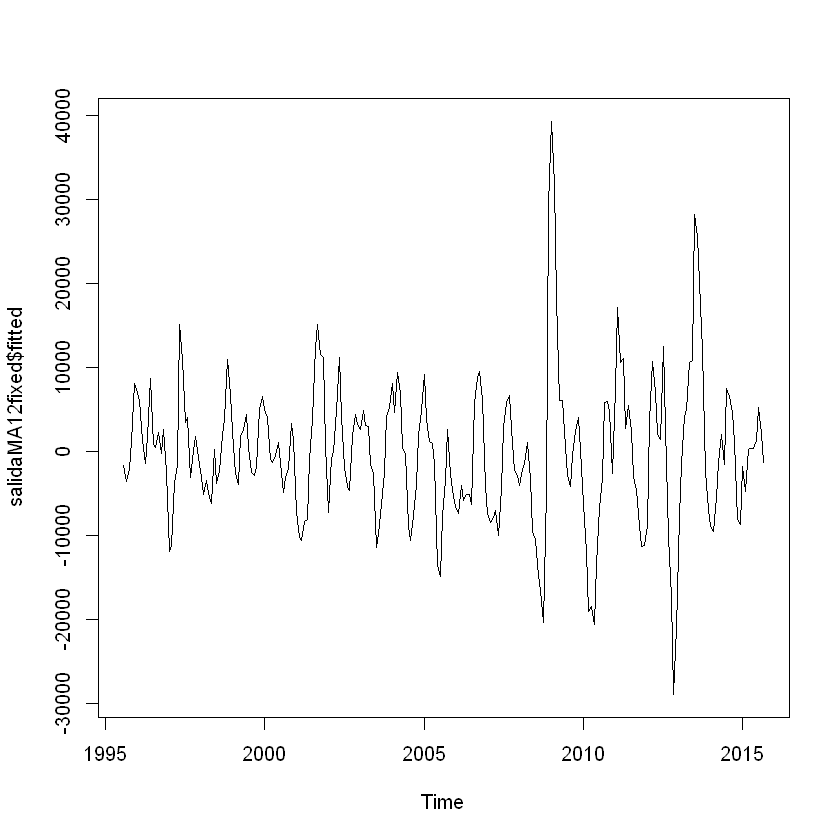

In [21]:
plot(salidaMA12fixed$fitted) 

Ahora el objetivo es verificar o chequear si los supuestos del modelo se cumplen.


## Validación de supuestos

Con base al proceso $\{X_t\}\sim ARMA(p,q)$ el supuesto fundamental propuesto desde el primer momento es  $\{Z_t\}\sim RBG(p,q)$, en consecuencia se verificarán los supuestos para el modelo los cuales están determinados por:

  * La presencia de Gaussianidad en el proceso $\{Z_t\}$
  * No autocorrelación del proceso $\{Z_t\}$ 
  * Varianza constante del proceso $\{Z_t\}$ 
  * La media de $\{Z_t\}$ es constante e igual a cero.

Como primer paso se observa la función de autocorrelación simple y parcial de los residuales las cuales son presentadas a continuación para observar la no autocorrelación, observandose acf, ninguna de las autocorrelaciones es significativa en ningún rezago.

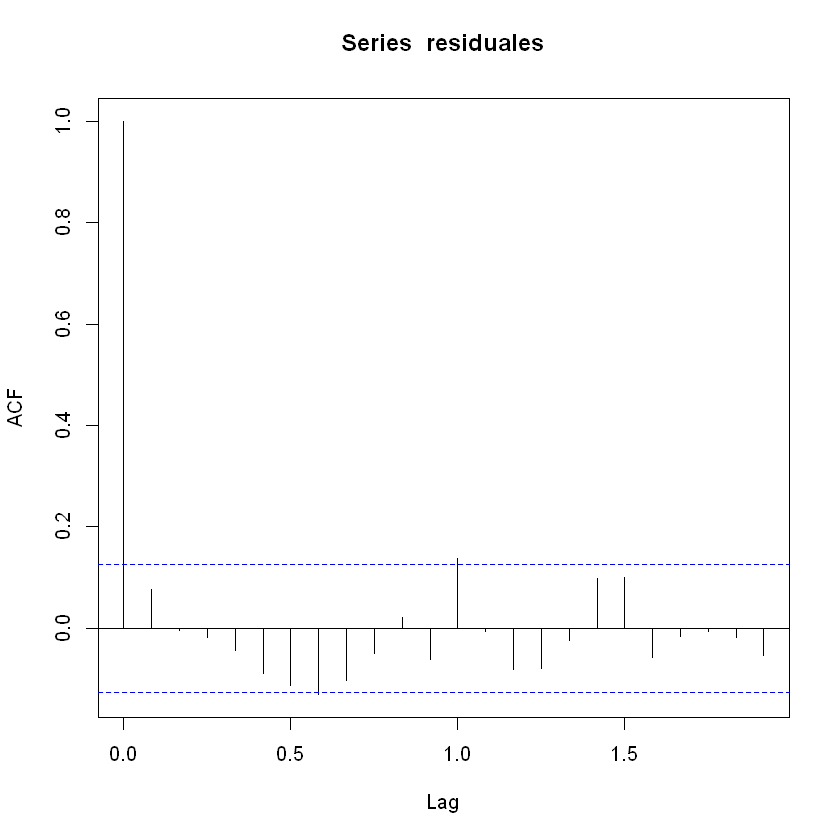

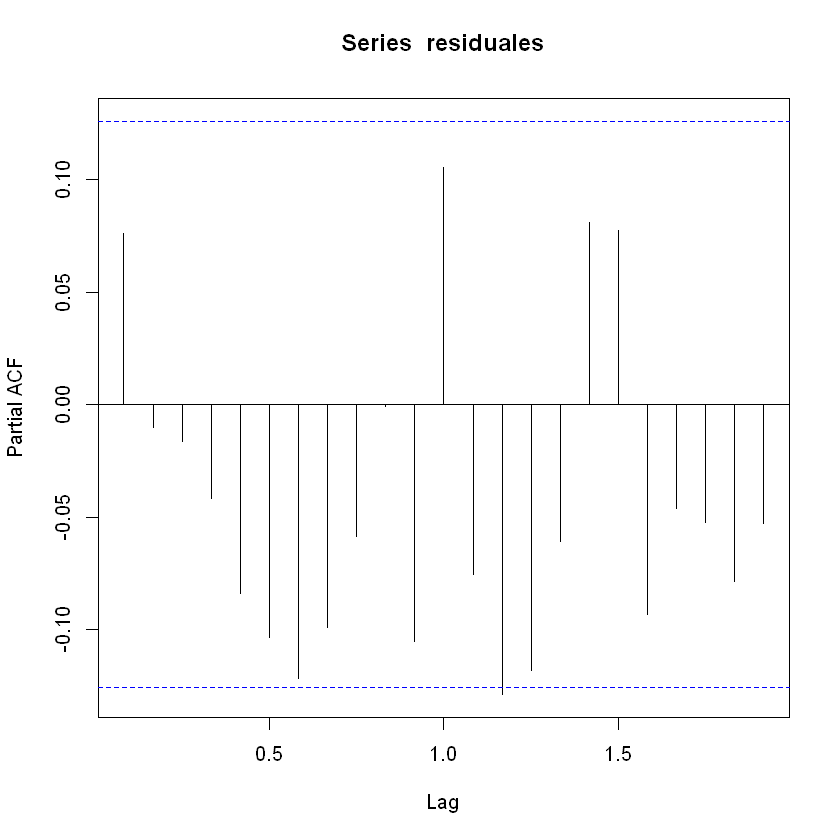

In [22]:
residuales=salidaMA12fixed$residuals
acf(residuales)
pacf(residuales)

En cuanto a la función de autocorrelación parcial se puede ver que ningun rezago es significativo, es decir no hay necesidad de especificar ordenes de tipo autorregresivos. Ota forma Para verificar el hecho de la no autocorrelación de los residuales es por medio de la siguiente prueba (aqui son 5 lo parámetros estimados en el modelo).

In [23]:
library(tseries)
Box.test(residuales, lag = (length(residuales)/4), type = "Ljung-Box", fitdf = 5)


	Box-Ljung test

data:  residuales
X-squared = 66.992, df = 55.5, p-value = 0.1388


Observando el valor p de la anterior prueba $pvalor=0.1388$ se observa que es mas grande que $\alpha=0.05$ con lo cual no se rechaza la hipótesis nula $H_0:$No autocorrelacion en $\{Z_t\}$. En lo que compete a la normalidad, se tiene la prueba de Jarque-Bera la cual arroja un p-valor muy pequeño concluyendose que no existe normalidad en el proceso, sin embargo esto no es un problema en series de tiempo.

In [24]:
library(tseries)
jarque.bera.test(residuales)


	Jarque Bera Test

data:  residuales
X-squared = 357.34, df = 2, p-value < 2.2e-16


## Pronósticos del modelo

Para generar los pronósticos del modelo se usará la libreria *Forecast* la cual usa el modelo ajustado (en este caso AR(1)), por consiguiente se presenta los pronósticos para un año *h=12*, cabe aclarar que entre más pasos adelante mayor incertidumbre existirá.

In [25]:
library(forecast)
PronosticosMA12=forecast(salidaMA12fixed,h=12,level=0.95);PronosticosMA12

Warning message in predict.Arima(object, n.ahead = h):
"MA part of model is not invertible"

         Point Forecast     Lo 95    Hi 95
Oct 2015      -2252.338 -34583.64 30078.96
Nov 2015      -8186.248 -40518.04 24145.54
Dec 2015      -5551.884 -39083.46 27979.69
Jan 2016      -3780.540 -38726.56 31165.48
Feb 2016      -2143.587 -38011.74 33724.57
Mar 2016          0.000 -36251.59 36251.59
Apr 2016          0.000 -36251.59 36251.59
May 2016          0.000 -36251.59 36251.59
Jun 2016          0.000 -36251.59 36251.59
Jul 2016          0.000 -36251.59 36251.59
Aug 2016          0.000 -36251.59 36251.59
Sep 2016          0.000 -36251.59 36251.59

Anteriormente se muestran los pronosticos, asi como los intervalos de predicción, estos también pueden ser vistos en la siguiente gráfica.

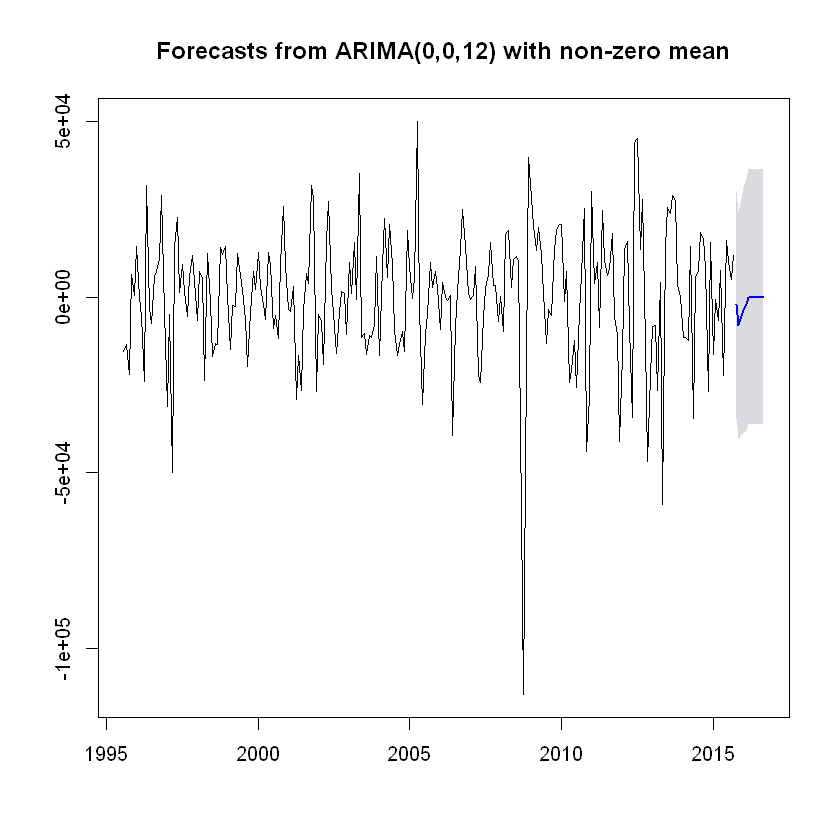

In [26]:
plot(PronosticosMA12)


## Outliers

En series de tiempo al quitar un outlier surge un problema y este es debido a que al quitarlo existirá un dato faltante, en este sentido la metodología usada anteriormente no será la indicada, la presencia de outliers puede ser causa de errores de medición o un comportamiento inusual debido a un factor externo, para poder analizar series con con outliers, 

la presencia de un outlier en series de tiempo puede generar:

* Incremento  de la varianza.
* Pueden alterar la distribución original de los datos haciendo que no se cumplan ciertos supuestos.
* Pueden sesgar o infuenciar los resultados a un camino incorrecto, puesto que los pronosticos pueden ser alterados.

Los pasos a seguir para el análisis de series de tiempo con outlier es:

* Detectar, en que mosmento del tiempo ocurrió dicho outlier.
* Identificar el tipo de outlier.
* Modelar conjuntamente los parámetros del modelo ARMA o ARIMA junto con los parámetros asociados a los outliers.

Con respecto a la serie de tiempo relativa a la producción de azucar, se puede observar que existe un outlier aditivo, puesto que se presenta cuando una observación tiene un
valor muy grande o muy pequeño. en este caso un valor muy pequeño, vease la serie:

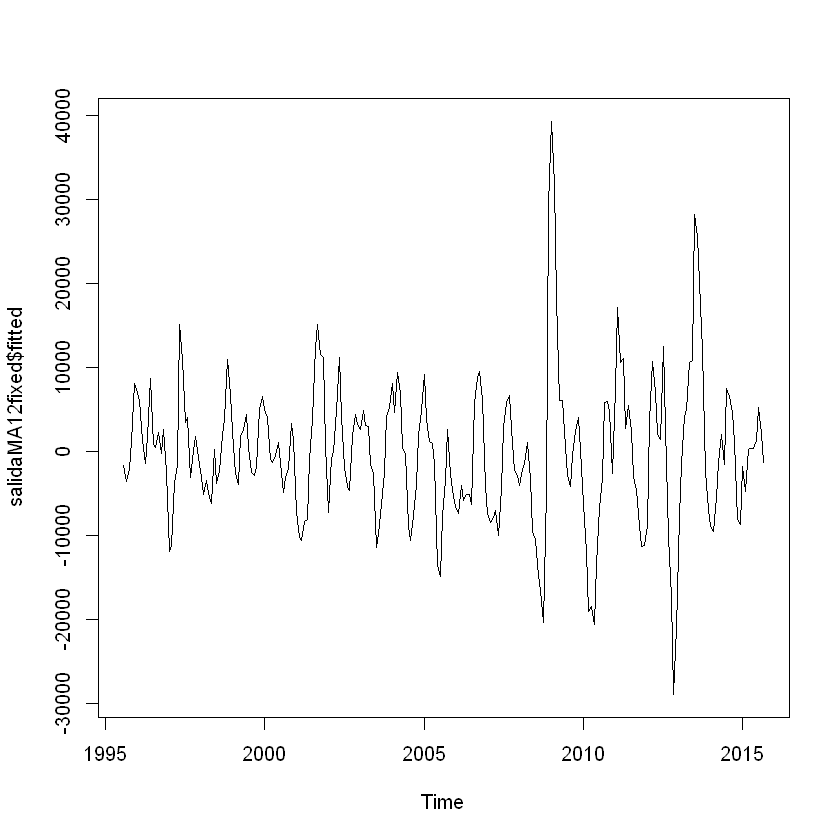

In [27]:
plot(salidaMA12fixed$fitted) 

Observándose si el modelo ajustado tiene outliers, se genera el siguiente código, mostrándose:


$arcoefs
numeric(0)

$macoefs
 [1]  0.0000000 -0.2817317 -0.3092850 -0.2527431 -0.1637525  0.0000000
 [7]  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000

attr(,"class")
[1] "ArimaPars"

type,ind,coefhat,tstat


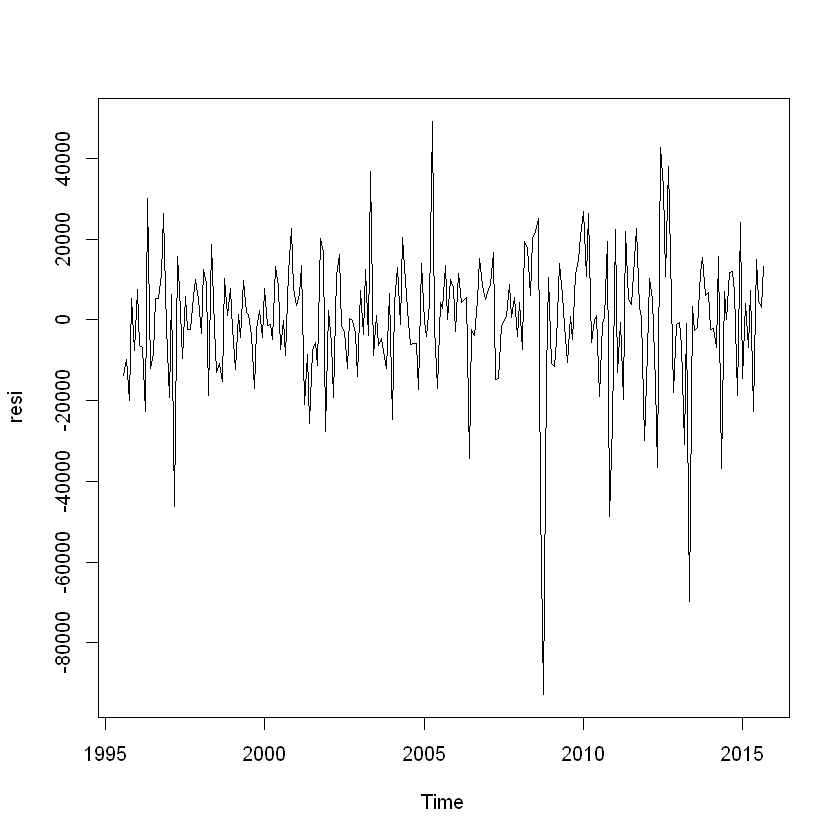

In [32]:
library(tsoutliers)
require( forecast)
#para poder usar la funcion locate.outliers hay que conocer los residuals del modelo ajustado
resi= residuals(salidaMA12fixed)
plot(resi)
coef= coefs2poly(salidaMA12fixed)
coef
locate.outliers(resi,coef) 

Finalmente se objetiene un modelo basado en descomposición basada en promedios móviles.


## Referencias

BANREP. _Producción de algunos bienes de la industria (Mensual desde 1995)_, disponible en http://www.banrep.gov.co/es/produccion